In [65]:
"""
    Plot the projected density map of the cube
"""

import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager
import numpy as np
import sys
sys.path.append('..')
import functions.calc_unit_conversion as uc

dpi = 600

plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi
plt.style.use(['science','ieee'])
plt.rcParams['figure.figsize'] = 5, 5
plt.rcParams["text.usetex"] = False



In [10]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [11]:
%%html
<style>
.output_svg div{
  width: 100% !important;
  height: 100% !important;
}
</style>

In [12]:
file_name = '../h5_projected/g1040_0016_binary_search_100_fib/r00_01_map.h5'

with h5py.File(file_name, 'r') as file:
    
    den1 = file['den'][:]
    print(file.keys())

file_name = '../h5_projected/g1041_9015_by_mass_100_fib/r00_01_map.h5'

with h5py.File(file_name, 'r') as file:
    
    den2 = file['den'][:]

<KeysViewHDF5 ['den', 'los_x', 'los_y', 'los_z', 'stoke_Q', 'stoke_U']>


In [13]:
den1[den1 == 0] = np.nan
den2[den2 == 0] = np.nan

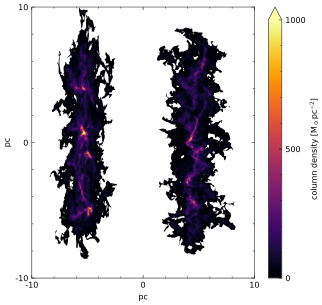

In [83]:
fig, axs = plt.subplots(1, 1, sharey=True, sharex=True )
plt.subplots_adjust(wspace=0)

max_den: float = 1000 # max(np.nanmax(den1[0][:,250:750]), np.nanmax(den2[0][:,250:750]))
min_den: float = 0
cmap: str = 'inferno'


bar = axs.imshow(den1[0][:,250:750], extent=[-10, 0, -10, 10], vmax=max_den, vmin=0, cmap = cmap, aspect = "auto")
axs.imshow(den2[0][:,250:750], extent=[0, 10, -10, 10], vmax=max_den, vmin=0, cmap = cmap, aspect = "auto")

axs.set_xlim([-10, 10])
axs.set_ylabel('pc')
axs.set_xlabel('pc')

axs.set_yticks([-10, 0, 10], [-10, 0, 10])
axs.set_xticks([-10, 0, 10], [-10, 0, 10])

cbar = fig.colorbar(bar, extend='max')
cbar.ax.set_yticks([0, 500, 1000])
cbar.ax.set_ylabel(r'column density [M$_\odot$pc$^{-2}$]')

plt.show()